# Testing the Asfgrid code

## Tomorrow:
- Set up a routine to:
 - Find Radius
 - Compare radius to Yu radius
 - Calculate appropriate error
 - Compare error to Yu error
 - Incorporate into existing structure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
sns.set_palette('colorblind')
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes',labelsize=20)
import os
import pandas as pd

In [2]:
__datdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/data/KepxDR2/'

def read_data():
    '''Reads in the Yu et al. 2018 data'''
    sfile = __datdir__+'rcxyu18.csv'
    df = pd.read_csv(sfile)
    return df

In [3]:
df = read_data()
tempdiff = 0.

In [4]:
from omnitool.literature_values import *
from omnitool import scalings
sc = scalings(df.numax, df.dnu, df.Teff + tempdiff,
                _numax_err = df.numax_err, _dnu_err = df.dnu_err, _Teff_err = df.Teff_err)

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Lets first test R, M and logg on their correspondence with the Yu values (uncorrected)

In [5]:
new = pd.DataFrame()
new['M_nc'] = sc.get_mass()/Msol
new['M_nc_err'] = sc.get_mass_err()/Msol
new['R_nc'] = sc.get_radius()/Rsol
new['R_nc_err'] = sc.get_radius_err()/Rsol
new['logg'] = sc.get_logg()
new['logg_err'] = sc.get_logg_err()

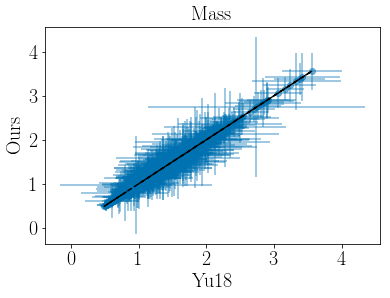

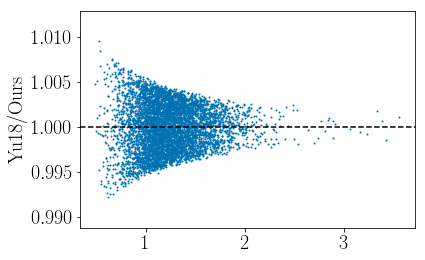

In [6]:
plt.errorbar(df.M_noCorrection, new.M_nc,
             xerr=df.M_noCorrection_err, yerr=new.M_nc_err, 
             alpha=.5,fmt='o', zorder=0)
plt.plot(df.M_noCorrection, df.M_noCorrection,c='k',linestyle='--',zorder=1)
plt.xlabel('Yu18')
plt.ylabel('Ours')
plt.title('Mass', fontsize=20)
plt.show()
plt.scatter(df.M_noCorrection, df.M_noCorrection/new.M_nc,s=1)
plt.axhline(1., c='k', linestyle='--')
plt.ylabel('Yu18/Ours')
plt.show()

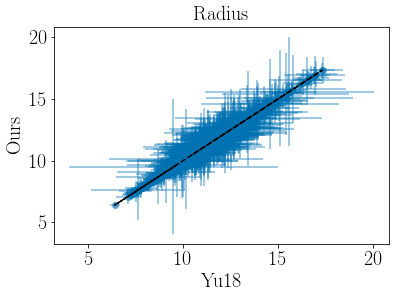

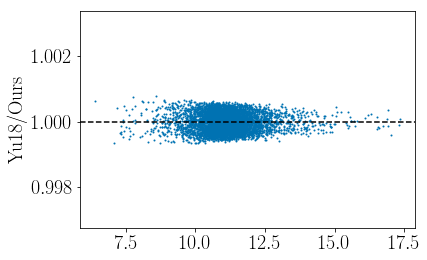

In [7]:
plt.errorbar(df.R_noCorrection, new.R_nc,
             xerr=df.R_noCorrection_err, yerr=new.R_nc_err, 
             alpha=.5,fmt='o', zorder=0)
plt.plot(df.R_noCorrection, df.R_noCorrection,c='k',linestyle='--',zorder=1)
plt.xlabel('Yu18')
plt.ylabel('Ours')
plt.title('Radius', fontsize=20)
plt.show()
plt.scatter(df.R_noCorrection, df.R_noCorrection/new.R_nc,s=1)
plt.axhline(1., c='k', linestyle='--')
plt.ylabel('Yu18/Ours')
plt.show()

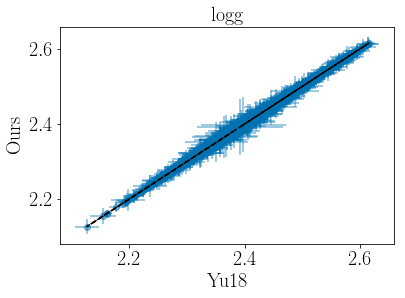

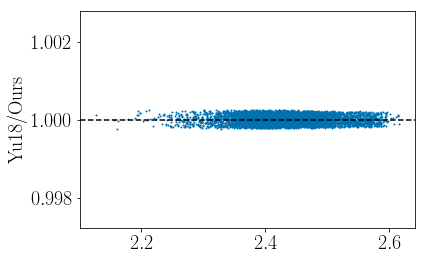

In [8]:
plt.errorbar(df.yu_logg, new.logg,
             xerr=df.yu_logg_err, yerr=new.logg_err, 
             alpha=.5,fmt='o', zorder=0)
plt.plot(df.yu_logg, df.yu_logg,c='k',linestyle='--',zorder=1)
plt.xlabel('Yu18')
plt.ylabel('Ours')
plt.title('logg', fontsize=20)
plt.show()
plt.scatter(df.yu_logg, df.yu_logg/new.logg,s=1)
plt.axhline(1., c='k', linestyle='--')
plt.ylabel('Yu18/Ours')
plt.show()

### Conclusions:

It looks like Yu18 generated the seismic values through the grid interpolation even where corrections were not necessary...?

### Update:
I get the impression from the work that *asfgrid* was only used to derive the correction to $\Delta\nu$, which was then implemented into the direct method. This does **not** explain the uncertainty in our results from the direct method, however.

## Now lets use asfgrid to recover uncorrected M, R, logg

In [9]:
import sys
sys.path.append('/home/oliver/PhD/Hacks_and_Mocks/asfgrid/')
import asfgrid

In [10]:
evstate = np.ones(len(df))*2
logz = np.log10(df.Z.values)
feh = df['[Fe/H]'].values
teff = df.Teff.values
dnu = df.dnu.values
numax = df.numax.values

asf = asfgrid.Seism()
mass, radius = asf.get_mass_radius(evstate, feh , teff, dnu, numax, isfeh=True)
logg = asf.mr2logg(mass, radius)

outside interp range 119  out of  5578


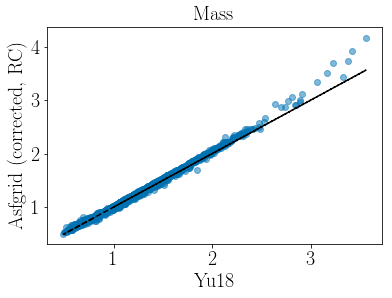

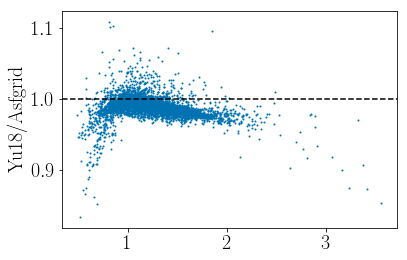

In [11]:
plt.scatter(df.M_noCorrection, mass,
             alpha=.5, zorder=0)
plt.plot(df.M_noCorrection, df.M_noCorrection,c='k',linestyle='--',zorder=1)
plt.xlabel('Yu18')
plt.ylabel('Asfgrid (corrected, RC)')
plt.title('Mass', fontsize=20)
plt.show()
plt.scatter(df.M_noCorrection, df.M_noCorrection/mass,s=1)
plt.axhline(1., c='k', linestyle='--')
plt.ylabel('Yu18/Asfgrid')
plt.show()

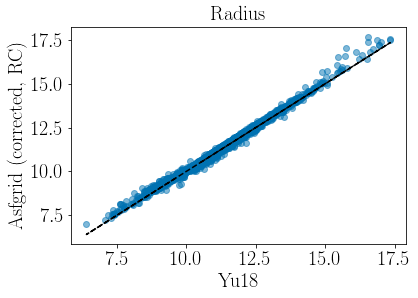

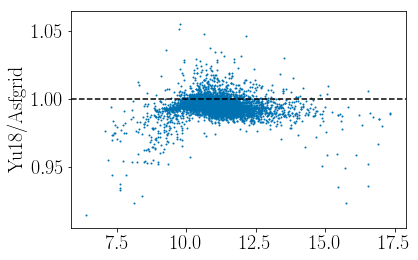

In [12]:
plt.scatter(df.R_noCorrection, radius,
             alpha=.5, zorder=0)
plt.plot(df.R_noCorrection, df.R_noCorrection,c='k',linestyle='--',zorder=1)
plt.xlabel('Yu18')
plt.ylabel('Asfgrid (corrected, RC)')
plt.title('Radius', fontsize=20)
plt.show()
plt.scatter(df.R_noCorrection, df.R_noCorrection/radius,s=1)
plt.axhline(1., c='k', linestyle='--')
plt.ylabel('Yu18/Asfgrid')
plt.show()

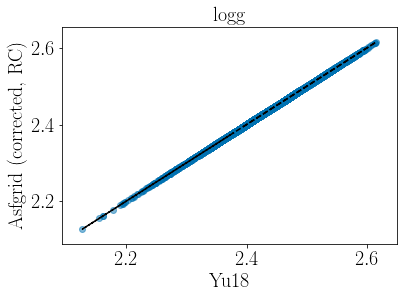

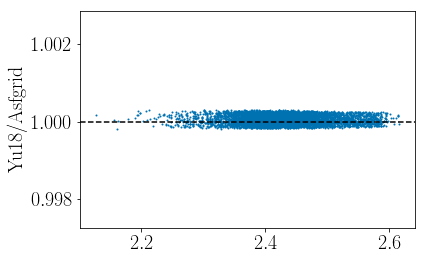

In [13]:
plt.scatter(df.yu_logg, logg,
             alpha=.5, zorder=0)
plt.plot(df.yu_logg, df.yu_logg,c='k',linestyle='--',zorder=1)
plt.xlabel('Yu18')
plt.ylabel('Asfgrid (corrected, RC)')
plt.title('logg', fontsize=20)
plt.show()
plt.scatter(df.yu_logg, df.yu_logg/logg,s=1)
plt.axhline(1., c='k', linestyle='--')
plt.ylabel('Yu18/Asfgrid')
plt.show()

## Okay, how about a comparison to corrected mass and radius

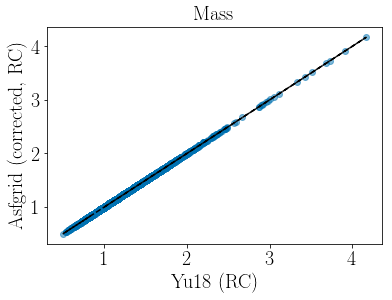

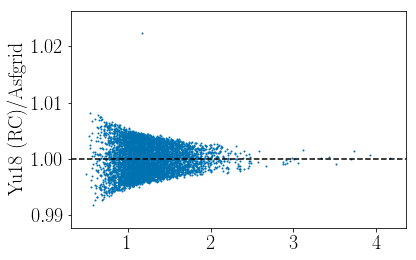

In [14]:
plt.scatter(df.M_Clump, mass,
             alpha=.5, zorder=0)
plt.plot(df.M_Clump, df.M_Clump,c='k',linestyle='--',zorder=1)
plt.xlabel('Yu18 (RC)')
plt.ylabel('Asfgrid (corrected, RC)')
plt.title('Mass', fontsize=20)
plt.show()
plt.scatter(df.M_Clump, df.M_Clump/mass,s=1)
plt.axhline(1., c='k', linestyle='--')
plt.ylabel('Yu18 (RC)/Asfgrid')
plt.show()

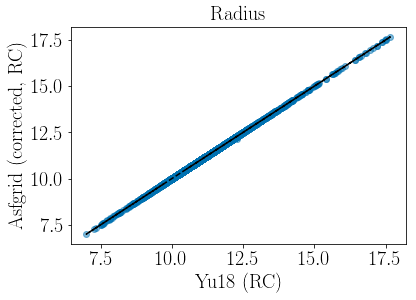

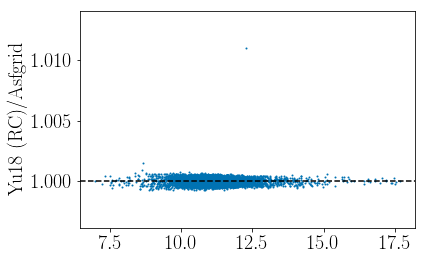

In [15]:
plt.scatter(df.R_Clump, radius,
             alpha=.5, zorder=0)
plt.plot(df.R_Clump, df.R_Clump,c='k',linestyle='--',zorder=1)
plt.xlabel('Yu18 (RC)')
plt.ylabel('Asfgrid (corrected, RC)')
plt.title('Radius', fontsize=20)
plt.show()
plt.scatter(df.R_Clump, df.R_Clump/radius,s=1)
plt.axhline(1., c='k', linestyle='--')
plt.ylabel('Yu18 (RC)/Asfgrid')
plt.show()

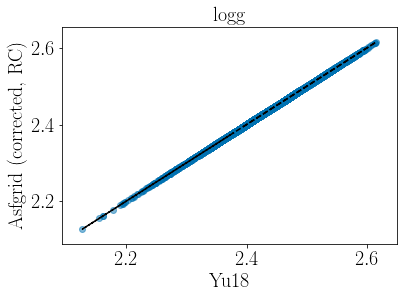

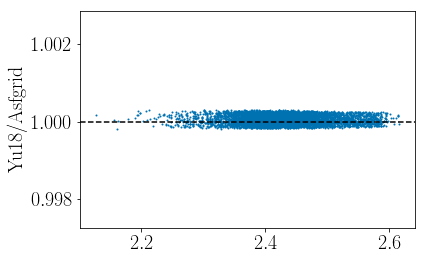

In [16]:
plt.scatter(df.yu_logg, logg,
             alpha=.5, zorder=0)
plt.plot(df.yu_logg, df.yu_logg,c='k',linestyle='--',zorder=1)
plt.xlabel('Yu18')
plt.ylabel('Asfgrid (corrected, RC)')
plt.title('logg', fontsize=20)
plt.show()
plt.scatter(df.yu_logg, df.yu_logg/logg,s=1)
plt.axhline(1., c='k', linestyle='--')
plt.ylabel('Yu18/Asfgrid')
plt.show()

## Conclusions:
From this I can draw a number of conclusions:
- Yu et al. 2018 did indeed calculate the uncorrected values through the direct method.
- There is some kind of **intrinsic scatter** between the results we obtain for the direct method despite using identical data.
- This same intrinsic scatter is present when obtaining M, R, through grid interpolation

## Now lets extract $f_{\Delta\nu}$ and use the direct method to find R and M

In [29]:
fdnu = asf._get_fdnu(evstate, logz, teff, mass, logg, fill_value='nearest')

#We can now add these values for fdnu to omnitool
sc.give_corrections(fdnu = fdnu)
new['M_rc'] = sc.get_mass()/Msol
new['M_rc_err'] = sc.get_mass_err()/Msol
new['R_rc'] = sc.get_radius()/Rsol
new['R_rc_err'] = sc.get_radius_err()/Rsol

outside interp range 361  out of  5578
You have passed corrections to the Delta Nu scaling relation


### First up is making sure it actually differs from our uncorrected data

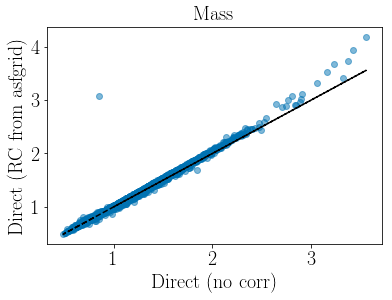

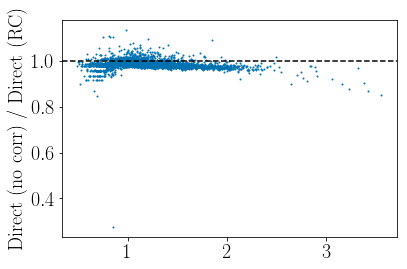

In [30]:
plt.scatter(new.M_nc, new.M_rc,
             alpha=.5, zorder=0)
plt.plot(new.M_nc, new.M_nc,c='k',linestyle='--',zorder=1)
plt.xlabel('Direct (no corr)')
plt.ylabel('Direct (RC from asfgrid)')
plt.title('Mass', fontsize=20)
plt.show()
plt.scatter(new.M_nc, new.M_nc/new.M_rc,s=1)
plt.axhline(1., c='k', linestyle='--')
plt.ylabel('Direct (no corr) / Direct (RC)')
plt.show()

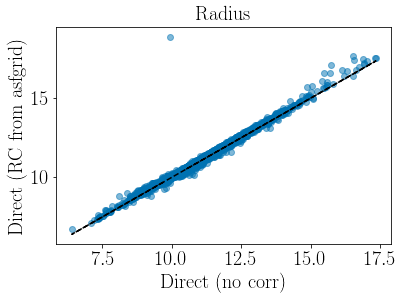

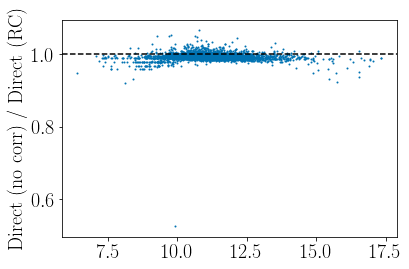

In [31]:
plt.scatter(new.R_nc, new.R_rc,
             alpha=.5, zorder=0)
plt.plot(new.R_nc, new.R_nc,c='k',linestyle='--',zorder=1)
plt.xlabel('Direct (no corr)')
plt.ylabel('Direct (RC from asfgrid)')
plt.title('Radius', fontsize=20)
plt.show()
plt.scatter(new.R_nc, new.R_nc/new.R_rc,s=1)
plt.axhline(1., c='k', linestyle='--')
plt.ylabel('Direct (no corr) / Direct (RC)')
plt.show()

### Temporary Conclusions:
- There appears to be a slight shift when applying the corrections, good!

### Now lets check out the comparison between ours and Yu18 corrected!

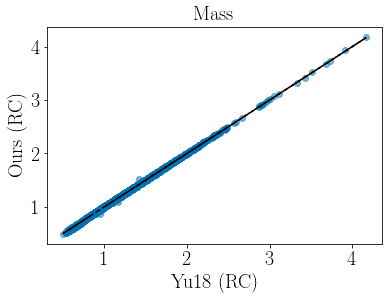

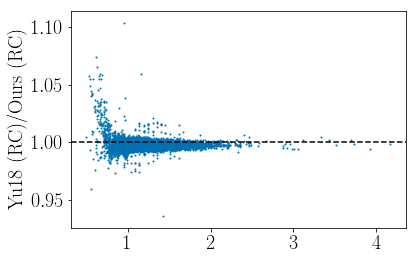

In [36]:
sel = df.M_Clump/new.M_rc > .8

plt.scatter(df.M_Clump[sel], new.M_rc[sel],
             alpha=.5, zorder=0)
plt.plot(df.M_Clump[sel], df.M_Clump[sel],c='k',linestyle='--',zorder=1)
plt.xlabel('Yu18 (RC)')
plt.ylabel('Ours (RC)')
plt.title('Mass', fontsize=20)
plt.show()
plt.scatter(df.M_Clump[sel], df.M_Clump[sel]/new.M_rc[sel],s=1)
plt.axhline(1., c='k', linestyle='--')
plt.ylabel('Yu18 (RC)/Ours (RC)')
plt.show()

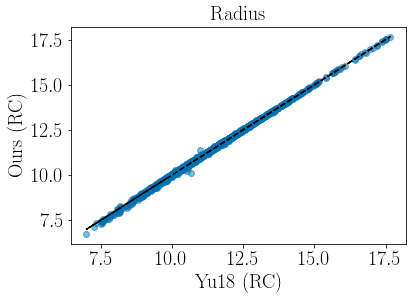

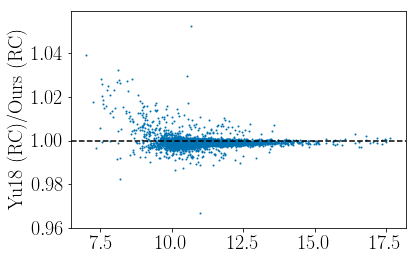

In [35]:
sel = df.R_Clump/new.R_rc > .8
plt.scatter(df.R_Clump[sel], new.R_rc[sel],
             alpha=.5, zorder=0)
plt.plot(df.R_Clump[sel], df.R_Clump[sel],c='k',linestyle='--',zorder=1)
plt.xlabel('Yu18 (RC)')
plt.ylabel('Ours (RC)')
plt.title('Radius', fontsize=20)
plt.show()
plt.scatter(df.R_Clump[sel], df.R_Clump[sel]/new.R_rc[sel],s=1)
plt.axhline(1., c='k', linestyle='--')
plt.ylabel('Yu18 (RC)/Ours (RC)')
plt.show()

# Conclusions
Despite a single outlier (which I've killed), I'm stilling getting 5-10% offset in Mass and 2-4% offset in radius. It should be noted that these discrepancies are within the traditionally tested uncertainties on the scaling relations.

- There is still some curious scatter between our results and the results from Yu+ 18 using the same seismic parameters
- The scatter appears to be within the traditional uncertainties on the scaling relations.